# Accidental Drug Related Deaths

This is an analysis of Accidental Drug Related Deaths in the US between the years 2012-2018

__Data set from:__ https://catalog.data.gov/dataset/accidental-drug-related-deaths-january-2012-sept-2015

The analysis explores the following questions:

### *Primary Question:*
1. What is the most significant factor determining accidental drug-related death?

### *Secondary Questions:*
1. Which drug or combinations of drugs were most lethal?
2. How significant is ‘Age’ as an explanatory variable?
3. How significant is ‘Race’ as an explanatory variable?
4. Place of death (Residence vs. Other) significant?
5. Optional variable we could analyze: Description of Injury (Drug Use, Ingestion, Injection, etc)

In [36]:
#Imports - Numpy, Pandas, MatPlotLib, Seaborn
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#Show plots magic function
%matplotlib inline

## EDA

In [37]:
#Get the file and assign it to add_df (stands for Accidental Drug Deaths DataFrame)
#add_df = pd.read_csv('../data/raw/Accidental_Drug_Related_Deaths_2012-2018.csv')
DrugData = pd.read_csv('../data/raw/Accidental_Drug_Related_Deaths_2012-2018.csv')
Holiday_Data=pd.read_csv('../data/raw/US Holidays 2012-2018.csv',sep=',')
locales=pd.read_csv('../data/raw/locales.csv')
connecticut=pd.read_csv('../data/raw/connecticut_pop.csv')

#Check the info and data
DrugData.info()
DrugData.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 41 columns):
ID                     5105 non-null object
Date                   5103 non-null object
DateType               5103 non-null object
Age                    5102 non-null float64
Sex                    5099 non-null object
Race                   5092 non-null object
ResidenceCity          4932 non-null object
ResidenceCounty        4308 non-null object
ResidenceState         3556 non-null object
DeathCity              5100 non-null object
DeathCounty            4005 non-null object
Location               5081 non-null object
LocationifOther        590 non-null object
DescriptionofInjury    4325 non-null object
InjuryPlace            5039 non-null object
InjuryCity             3349 non-null object
InjuryCounty           2364 non-null object
InjuryState            1424 non-null object
COD                    5105 non-null object
OtherSignifican        169 non-null object
Heroin        

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,InjuryCityGeo,ResidenceCityGeo
0,12-0001,01/01/2012 12:00:00 AM,DateofDeath,35.0,Male,White,HEBRON,TOLLAND,NaN,HEBRON,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"HEBRON, CT\r\n(41.658069, -72.366324)",NaN,"HEBRON\r\n(43.694742, -71.808963)"
1,12-0002,01/03/2012 12:00:00 AM,DateofDeath,41.0,Male,White,BRISTOL,HARTFORD,NaN,BRISTOL,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Bristol, CT\r\n(41.673037, -72.945791)",NaN,"BRISTOL\r\n(41.673037, -72.945791)"
2,12-0003,01/04/2012 12:00:00 AM,DateofDeath,61.0,Male,Black,DANBURY,FAIRFIELD,NaN,DANBURY,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Danbury, CT\r\n(41.393666, -73.451539)",NaN,"DANBURY\r\n(41.393666, -73.451539)"
3,12-0004,01/05/2012 12:00:00 AM,DateofDeath,51.0,Male,White,STRATFORD,FAIRFIELD,NaN,BRIDGEPORT,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"BRIDGEPORT, CT\r\n(41.179195, -73.189476)",NaN,"STRATFORD\r\n(41.200888, -73.131323)"
4,12-0005,01/07/2012 12:00:00 AM,DateofDeath,45.0,Male,White,HARTFORD,HARTFORD,NaN,HARTFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"HARTFORD, CT\r\n(41.765775, -72.673356)",NaN,"HARTFORD\r\n(41.765775, -72.673356)"


In [38]:
#Check missing data
DrugData.isnull().sum()

ID                        0
Date                      2
DateType                  2
Age                       3
Sex                       6
Race                     13
ResidenceCity           173
ResidenceCounty         797
ResidenceState         1549
DeathCity                 5
DeathCounty            1100
Location                 24
LocationifOther        4515
DescriptionofInjury     780
InjuryPlace              66
InjuryCity             1756
InjuryCounty           2741
InjuryState            3681
COD                       0
OtherSignifican        4936
Heroin                 2576
Cocaine                3584
Fentanyl               2873
FentanylAnalogue       4716
Oxycodone              4498
Oxymorphone            4997
Ethanol                3858
Hydrocodone            4987
Benzodiazepine         3762
Methadone              4631
Amphet                 4946
Tramad                 4975
Morphine_NotHeroin     5063
Hydromorphone          5080
Other                  4670
OpiateNOS           

In [39]:
#Dropping rows with irreplaceable null values
DrugData.dropna(subset=['Date', 'Age', 'Sex', 'Race'], inplace=True)
DrugData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5088 entries, 0 to 5104
Data columns (total 41 columns):
ID                     5088 non-null object
Date                   5088 non-null object
DateType               5088 non-null object
Age                    5088 non-null float64
Sex                    5088 non-null object
Race                   5088 non-null object
ResidenceCity          4921 non-null object
ResidenceCounty        4299 non-null object
ResidenceState         3547 non-null object
DeathCity              5087 non-null object
DeathCounty            3997 non-null object
Location               5068 non-null object
LocationifOther        588 non-null object
DescriptionofInjury    4311 non-null object
InjuryPlace            5023 non-null object
InjuryCity             3336 non-null object
InjuryCounty           2355 non-null object
InjuryState            1419 non-null object
COD                    5088 non-null object
OtherSignifican        168 non-null object
Heroin        

In [40]:
#Deal with date, adding column year, month, day_of_week, Holiday
date_new = pd.to_datetime(DrugData['Date'])
DrugData.insert(loc=2, column='new_date', value=date_new)
DrugData.insert(loc=3,column='Year',value=DrugData['new_date'].dt.year)

DrugData.insert(loc=4,column='Month',value=DrugData['new_date'].dt.month)
months={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
DrugData['Month'] = DrugData['Month'].apply(lambda x: months[x])

DrugData.insert(loc=5,column='day_of_week',value=DrugData['new_date'].dt.dayofweek)
days = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
DrugData['day_of_week'] = DrugData['day_of_week'].apply(lambda x: days[x])


In [41]:
#merge holiday dates with DrugDates
Holiday_Data['Date']=pd.to_datetime(Holiday_Data['Date'])
Holiday_Data.rename(columns={'Date':'new_date'},inplace=True)
Drug_Data = pd.merge(DrugData, Holiday_Data, on='new_date', how='left')
Holiday_col=Drug_Data.pop('Holiday')
Drug_Data.insert(loc=6,column='Holiday',value=Holiday_col)
Drug_Data.head()

,ID,Date,new_date,Year,Month,day_of_week,Holiday,DateType,Age,Sex,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,InjuryCityGeo,ResidenceCityGeo
0,12-0001,01/01/2012 12:00:00 AM,2012-01-01,2012,Jan,Sun,NaN,DateofDeath,35.0,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"HEBRON, CT\r\n(41.658069, -72.366324)",NaN,"HEBRON\r\n(43.694742, -71.808963)"
1,12-0002,01/03/2012 12:00:00 AM,2012-01-03,2012,Jan,Tue,NaN,DateofDeath,41.0,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Bristol, CT\r\n(41.673037, -72.945791)",NaN,"BRISTOL\r\n(41.673037, -72.945791)"
2,12-0003,01/04/2012 12:00:00 AM,2012-01-04,2012,Jan,Wed,NaN,DateofDeath,61.0,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Danbury, CT\r\n(41.393666, -73.451539)",NaN,"DANBURY\r\n(41.393666, -73.451539)"
3,12-0004,01/05/2012 12:00:00 AM,2012-01-05,2012,Jan,Thur,NaN,DateofDeath,51.0,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"BRIDGEPORT, CT\r\n(41.179195, -73.189476)",NaN,"STRATFORD\r\n(41.200888, -73.131323)"
4,12-0005,01/07/2012 12:00:00 AM,2012-01-07,2012,Jan,Sat,NaN,DateofDeath,45.0,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"HARTFORD, CT\r\n(41.765775, -72.673356)",NaN,"HARTFORD\r\n(41.765775, -72.673356)"


In [42]:
#Adding back missing value in Residence State: the result could adding back Residence state 1308 missing value
# extract ResidenceCity,ResidenceState create reference table Residency_Adj
Residency_Adj=Drug_Data.loc[:, ['ResidenceCity','ResidenceState']]
Residency_Adj= Residency_Adj.groupby(['ResidenceCity', 'ResidenceState']).size().reset_index(name='Freq')
#Residency_Adj.info()
#check whether the column ResidenceCity has duplicate value
Residency_Adj['is_duplicated'] = Residency_Adj.duplicated(['ResidenceCity'],keep=False)
Residency_Adj['is_duplicated'].sum()
Residency_Adj[Residency_Adj['is_duplicated']==True]
#Drop the rows in Residency_Adj , only keep the right State for the duplicate cities.
#from wiki, Brooklyn belongs to state NY, Hampton to state NH, PLYMOUTH belongs to MA, REDDING states should be CA 
#and WARREN state is RI
Residency_Adj=Residency_Adj.drop([30,96,206,217,277,278],axis=0)
Residency_Adj.at[218,'ResidenceState']='CA'

#check whether the column ResidenceCity has duplicate value
Residency_Adj['is_duplicated'] = Residency_Adj.duplicated(['ResidenceCity'],keep=False)
Residency_Adj[Residency_Adj['is_duplicated']==True]
#Residency_Adj.info()

#use the reference table Residency_Adj to generate new column Residence_State_updated in Drug_Data with less missing value
Residency_Adj.rename(columns={'ResidenceState':'ResidenceState_update'},inplace=True)
add_df = pd.merge(Drug_Data, Residency_Adj, on='ResidenceCity', how='left')
Rstate_col=add_df.pop('ResidenceState_update')
add_df.insert(loc=12,column='ResidenceState_update',value=Rstate_col)
add_df=add_df.drop(['Freq','is_duplicated'],axis=1)
add_df.head()

,ID,Date,new_date,Year,Month,day_of_week,Holiday,DateType,Age,Sex,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,InjuryCityGeo,ResidenceCityGeo
0,12-0001,01/01/2012 12:00:00 AM,2012-01-01,2012,Jan,Sun,NaN,DateofDeath,35.0,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"HEBRON, CT\r\n(41.658069, -72.366324)",NaN,"HEBRON\r\n(43.694742, -71.808963)"
1,12-0002,01/03/2012 12:00:00 AM,2012-01-03,2012,Jan,Tue,NaN,DateofDeath,41.0,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Bristol, CT\r\n(41.673037, -72.945791)",NaN,"BRISTOL\r\n(41.673037, -72.945791)"
2,12-0003,01/04/2012 12:00:00 AM,2012-01-04,2012,Jan,Wed,NaN,DateofDeath,61.0,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Danbury, CT\r\n(41.393666, -73.451539)",NaN,"DANBURY\r\n(41.393666, -73.451539)"
3,12-0004,01/05/2012 12:00:00 AM,2012-01-05,2012,Jan,Thur,NaN,DateofDeath,51.0,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"BRIDGEPORT, CT\r\n(41.179195, -73.189476)",NaN,"STRATFORD\r\n(41.200888, -73.131323)"
4,12-0005,01/07/2012 12:00:00 AM,2012-01-07,2012,Jan,Sat,NaN,DateofDeath,45.0,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"HARTFORD, CT\r\n(41.765775, -72.673356)",NaN,"HARTFORD\r\n(41.765775, -72.673356)"


In [43]:
add_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5088 entries, 0 to 5087
Data columns (total 47 columns):
ID                       5088 non-null object
Date                     5088 non-null object
new_date                 5088 non-null datetime64[ns]
Year                     5088 non-null int64
Month                    5088 non-null object
day_of_week              5088 non-null object
Holiday                  155 non-null object
DateType                 5088 non-null object
Age                      5088 non-null float64
Sex                      5088 non-null object
Race                     5088 non-null object
ResidenceCity            4921 non-null object
ResidenceState_update    4853 non-null object
ResidenceCounty          4299 non-null object
ResidenceState           3547 non-null object
DeathCity                5087 non-null object
DeathCounty              3997 non-null object
Location                 5068 non-null object
LocationifOther          588 non-null object
Descriptionof

In [44]:
#Splitting DeathCityGeo and ResidenceCityGeo into Coordinates(long/lat) and Cities
add_df[['DeathCityCounty', 'DeathCoordinates']] = add_df['DeathCityGeo'].str.split('\n', expand = True)
add_df[['DeathCityExtracted', 'DeathCountyExtracted']] = add_df['DeathCityCounty'].str.split(',', expand = True)
add_df[['ResidenceCityExtracted', 'ResidenceCoordinates']] =add_df['ResidenceCityGeo'].str.split('\n', expand = True)

In [45]:
#Dropping all the columns we're not involved in the analysis
add_df.drop(['ID', 'DateType', 'MannerofDeath', 'ResidenceCounty', 'ResidenceState', 'DeathCounty', 'InjuryPlace', 
               'InjuryCity', 'InjuryCounty', 'InjuryState', 'OtherSignifican', 'InjuryCityGeo', 'COD', 'DeathCountyExtracted', 
               'DeathCityCounty', 'DeathCityGeo', 'ResidenceCityGeo'], axis=1, inplace = True)
add_df.head()

,Date,new_date,Year,Month,day_of_week,Holiday,Age,Sex,Race,ResidenceCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,DeathCoordinates,DeathCityExtracted,ResidenceCityExtracted,ResidenceCoordinates
0,01/01/2012 12:00:00 AM,2012-01-01,2012,Jan,Sun,NaN,35.0,Male,White,HEBRON,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.658069, -72.366324)",HEBRON,HEBRON\r,"(43.694742, -71.808963)"
1,01/03/2012 12:00:00 AM,2012-01-03,2012,Jan,Tue,NaN,41.0,Male,White,BRISTOL,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.673037, -72.945791)",Bristol,BRISTOL\r,"(41.673037, -72.945791)"
2,01/04/2012 12:00:00 AM,2012-01-04,2012,Jan,Wed,NaN,61.0,Male,Black,DANBURY,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.393666, -73.451539)",Danbury,DANBURY\r,"(41.393666, -73.451539)"
3,01/05/2012 12:00:00 AM,2012-01-05,2012,Jan,Thur,NaN,51.0,Male,White,STRATFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.179195, -73.189476)",BRIDGEPORT,STRATFORD\r,"(41.200888, -73.131323)"
4,01/07/2012 12:00:00 AM,2012-01-07,2012,Jan,Sat,NaN,45.0,Male,White,HARTFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.765775, -72.673356)",HARTFORD,HARTFORD\r,"(41.765775, -72.673356)"


In [46]:
#Make all string values uppercase
add_df = add_df.applymap(lambda x: x if type(x) != str  else x.upper())

#Checking to make sure NaN values haven't been affected.
add_df.LocationifOther[0]

nan

In [47]:
#Locating the NaN value in the DeathCity
DeathCityMissingloc = np.where(add_df['DeathCity'].isna())
DeathCityMissingloc

(array([137], dtype=int64),)

In [48]:
#Filling the NaN value of the DeathCity and overview of the cleaning process
add_df['DeathCity'].fillna(add_df['DeathCityExtracted'], inplace = True)
add_df.info()
add_df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5088 entries, 0 to 5087
Data columns (total 36 columns):
Date                      5088 non-null object
new_date                  5088 non-null datetime64[ns]
Year                      5088 non-null int64
Month                     5088 non-null object
day_of_week               5088 non-null object
Holiday                   155 non-null object
Age                       5088 non-null float64
Sex                       5088 non-null object
Race                      5088 non-null object
ResidenceCity             4921 non-null object
ResidenceState_update     4853 non-null object
DeathCity                 5088 non-null object
Location                  5068 non-null object
LocationifOther           588 non-null object
DescriptionofInjury       4311 non-null object
Heroin                    2525 non-null object
Cocaine                   1514 non-null object
Fentanyl                  2225 non-null object
FentanylAnalogue          388 non-null ob

,Date,new_date,Year,Month,day_of_week,Holiday,Age,Sex,Race,ResidenceCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,DeathCoordinates,DeathCityExtracted,ResidenceCityExtracted,ResidenceCoordinates
0,01/01/2012 12:00:00 AM,2012-01-01,2012,JAN,SUN,NaN,35.0,MALE,WHITE,HEBRON,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.658069, -72.366324)",HEBRON,HEBRON\r,"(43.694742, -71.808963)"
1,01/03/2012 12:00:00 AM,2012-01-03,2012,JAN,TUE,NaN,41.0,MALE,WHITE,BRISTOL,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.673037, -72.945791)",BRISTOL,BRISTOL\r,"(41.673037, -72.945791)"
2,01/04/2012 12:00:00 AM,2012-01-04,2012,JAN,WED,NaN,61.0,MALE,BLACK,DANBURY,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.393666, -73.451539)",DANBURY,DANBURY\r,"(41.393666, -73.451539)"
3,01/05/2012 12:00:00 AM,2012-01-05,2012,JAN,THUR,NaN,51.0,MALE,WHITE,STRATFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.179195, -73.189476)",BRIDGEPORT,STRATFORD\r,"(41.200888, -73.131323)"
4,01/07/2012 12:00:00 AM,2012-01-07,2012,JAN,SAT,NaN,45.0,MALE,WHITE,HARTFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.765775, -72.673356)",HARTFORD,HARTFORD\r,"(41.765775, -72.673356)"
5,01/08/2012 12:00:00 AM,2012-01-08,2012,JAN,SUN,NaN,51.0,MALE,WHITE,WATERBURY,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.554261, -73.043069)",WATERBURY,WATERBURY\r,"(41.554261, -73.043069)"
6,01/08/2012 12:00:00 AM,2012-01-08,2012,JAN,SUN,NaN,24.0,FEMALE,WHITE,STAMFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.051924, -73.539475)",STAMFORD,STAMFORD\r,"(41.051924, -73.539475)"
7,01/08/2012 12:00:00 AM,2012-01-08,2012,JAN,SUN,NaN,33.0,MALE,WHITE,BROOKLYN,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.914993, -71.911904)",PUTNAM,BROOKLYN\r,"(40.692529, -73.990996)"
8,01/11/2012 12:00:00 AM,2012-01-11,2012,JAN,WED,NaN,54.0,MALE,WHITE,DEEP RIVER,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.385619, -72.435658)",DEEP RIVER,DEEP RIVER\r,"(41.385619, -72.435658)"
9,01/12/2012 12:00:00 AM,2012-01-12,2012,JAN,THUR,NaN,46.0,MALE,WHITE,SOUTHINGTON,...,NaN,NaN,NaN,BATH SALT,NaN,NaN,"(41.600428, -72.878105)",SOUTHINGTON,SOUTHINGTON\r,"(41.600428, -72.878105)"


In [49]:
add_df = pd.merge(add_df, connecticut, left_on='DeathCity', right_on='Town', how='left')
add_df = add_df.drop(['Town'], axis=1)

In [50]:
add_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5088 entries, 0 to 5087
Data columns (total 37 columns):
Date                      5088 non-null object
new_date                  5088 non-null datetime64[ns]
Year                      5088 non-null int64
Month                     5088 non-null object
day_of_week               5088 non-null object
Holiday                   155 non-null object
Age                       5088 non-null float64
Sex                       5088 non-null object
Race                      5088 non-null object
ResidenceCity             4921 non-null object
ResidenceState_update     4853 non-null object
DeathCity                 5088 non-null object
Location                  5068 non-null object
LocationifOther           588 non-null object
DescriptionofInjury       4311 non-null object
Heroin                    2525 non-null object
Cocaine                   1514 non-null object
Fentanyl                  2225 non-null object
FentanylAnalogue          388 non-null ob

In [51]:
#Merge the results
add_df = pd.merge(add_df, locales, on='LocationifOther', how='left')

#Fill the new location field with the original Location field where there are NAs
add_df.cleaned_location = add_df.cleaned_location.fillna(add_df.Location)

#map the key phrases from the location column to more singular locations
place={'NAN':"OTHER",'COMMERCIAL':"OTHER",'CONVALESCENT HOME':'SUPERVISED CARE/HOSPITAL','HOSPICE':'SUPERVISED CARE/HOSPITAL','NURSING HOME':'SUPERVISED CARE/HOSPITAL','HOSPITAL':'SUPERVISED CARE/HOSPITAL','HOTEL':"OTHER",'OTHER':"OTHER",'RESIDENCE':"RESIDENCE",'SUPERVISED':"SUPERVISED CARE/HOSPITAL",'VEHICLE':"OTHER"}

add_df['cleaned_location'] = add_df['cleaned_location'].map(place)

#Fill the new location field with the original Location field where there are NAs
add_df.cleaned_location = add_df.cleaned_location.fillna('OTHER')

print(add_df.groupby(['cleaned_location'])['cleaned_location'].count())

cleaned_location
OTHER                        537
RESIDENCE                   2913
SUPERVISED CARE/HOSPITAL    1638
Name: cleaned_location, dtype: int64


## Which drug or combinations of drugs were most lethal?

Although the COD column explains the use of drugs, it is too verbose and is difficult to group similar values. We will create a new column 'drugs_involved' and poupulate it with the drugs marked 'Y' (suggesting involvement) separated by commas. We also have to arrange these in an alphabetical manner so it will make it easy to group them.

In [52]:
add_df

,Date,new_date,Year,Month,day_of_week,Holiday,Age,Sex,Race,ResidenceCity,...,Hydromorphone,Other,OpiateNOS,AnyOpioid,DeathCoordinates,DeathCityExtracted,ResidenceCityExtracted,ResidenceCoordinates,Population,cleaned_location
0,01/01/2012 12:00:00 AM,2012-01-01,2012,JAN,SUN,NaN,35.0,MALE,WHITE,HEBRON,...,NaN,NaN,NaN,NaN,"(41.658069, -72.366324)",HEBRON,HEBRON\r,"(43.694742, -71.808963)",9686.0,RESIDENCE
1,01/03/2012 12:00:00 AM,2012-01-03,2012,JAN,TUE,NaN,41.0,MALE,WHITE,BRISTOL,...,NaN,NaN,NaN,NaN,"(41.673037, -72.945791)",BRISTOL,BRISTOL\r,"(41.673037, -72.945791)",60477.0,SUPERVISED CARE/HOSPITAL
2,01/04/2012 12:00:00 AM,2012-01-04,2012,JAN,WED,NaN,61.0,MALE,BLACK,DANBURY,...,NaN,NaN,NaN,NaN,"(41.393666, -73.451539)",DANBURY,DANBURY\r,"(41.393666, -73.451539)",80893.0,SUPERVISED CARE/HOSPITAL
3,01/05/2012 12:00:00 AM,2012-01-05,2012,JAN,THUR,NaN,51.0,MALE,WHITE,STRATFORD,...,NaN,NaN,NaN,NaN,"(41.179195, -73.189476)",BRIDGEPORT,STRATFORD\r,"(41.200888, -73.131323)",144229.0,RESIDENCE
4,01/07/2012 12:00:00 AM,2012-01-07,2012,JAN,SAT,NaN,45.0,MALE,WHITE,HARTFORD,...,NaN,NaN,NaN,NaN,"(41.765775, -72.673356)",HARTFORD,HARTFORD\r,"(41.765775, -72.673356)",124775.0,RESIDENCE
5,01/08/2012 12:00:00 AM,2012-01-08,2012,JAN,SUN,NaN,51.0,MALE,WHITE,WATERBURY,...,NaN,NaN,NaN,NaN,"(41.554261, -73.043069)",WATERBURY,WATERBURY\r,"(41.554261, -73.043069)",110366.0,RESIDENCE
6,01/08/2012 12:00:00 AM,2012-01-08,2012,JAN,SUN,NaN,24.0,FEMALE,WHITE,STAMFORD,...,NaN,NaN,NaN,NaN,"(41.051924, -73.539475)",STAMFORD,STAMFORD\r,"(41.051924, -73.539475)",122643.0,SUPERVISED CARE/HOSPITAL
7,01/08/2012 12:00:00 AM,2012-01-08,2012,JAN,SUN,NaN,33.0,MALE,WHITE,BROOKLYN,...,NaN,NaN,NaN,NaN,"(41.914993, -71.911904)",PUTNAM,BROOKLYN\r,"(40.692529, -73.990996)",7214.0,SUPERVISED CARE/HOSPITAL
8,01/11/2012 12:00:00 AM,2012-01-11,2012,JAN,WED,NaN,54.0,MALE,WHITE,DEEP RIVER,...,NaN,NaN,NaN,NaN,"(41.385619, -72.435658)",DEEP RIVER,DEEP RIVER\r,"(41.385619, -72.435658)",4629.0,RESIDENCE
9,01/12/2012 12:00:00 AM,2012-01-12,2012,JAN,THUR,NaN,46.0,MALE,WHITE,SOUTHINGTON,...,NaN,BATH SALT,NaN,NaN,"(41.600428, -72.878105)",SOUTHINGTON,SOUTHINGTON\r,"(41.600428, -72.878105)",43069.0,SUPERVISED CARE/HOSPITAL


In [53]:
#Get Column names
add_df.columns

Index(['Date', 'new_date', 'Year', 'Month', 'day_of_week', 'Holiday', 'Age',
       'Sex', 'Race', 'ResidenceCity', 'ResidenceState_update', 'DeathCity',
       'Location', 'LocationifOther', 'DescriptionofInjury', 'Heroin',
       'Cocaine', 'Fentanyl', 'FentanylAnalogue', 'Oxycodone', 'Oxymorphone',
       'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet',
       'Tramad', 'Morphine_NotHeroin', 'Hydromorphone', 'Other', 'OpiateNOS',
       'AnyOpioid', 'DeathCoordinates', 'DeathCityExtracted',
       'ResidenceCityExtracted', 'ResidenceCoordinates', 'Population',
       'cleaned_location'],
      dtype='object')

In [54]:
#Replace the indicator 'Y' with the name of the column in uppercase (in this case, the name of the drug).
#If null, don't change the value
def assignDrugName(value, column):
    if(value == 'Y'):
        return str(column).upper()
    else:
        return value

# Loop through the drugs columns. Don't change anything in the 'Other' column since it already has the name.
for column in add_df.loc[:, 'Heroin':'AnyOpioid']:
    if(column != 'Other'):
        add_df[column] = add_df[column].map(lambda value: assignDrugName(value, column))

add_df.loc[:, 'Heroin':'AnyOpioid'].head()

# add_df.AnyOpioid = add_df.AnyOpioid.fillna('N')


,Heroin,Cocaine,Fentanyl,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid
0,HEROIN,COCAINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HEROIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BENZODIAZEPINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,COCAINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,METHADONE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HEROIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
#Create a new column and append the values in the drug columns to track multiple-use
add_df['drugs_used'] = add_df.loc[:, 'Heroin':'AnyOpioid'].apply(lambda value: ', '.join(value[value.notnull()]), axis = 1)
add_df['drugs_used'].value_counts()

HEROIN                                                                                      340
COCAINE                                                                                     214
HEROIN, ANYOPIOID                                                                           209
FENTANYL, ANYOPIOID                                                                         200
HEROIN, FENTANYL, ANYOPIOID                                                                 162
HEROIN, COCAINE                                                                             144
FENTANYL                                                                                    106
HEROIN, FENTANYL                                                                            101
COCAINE, FENTANYL, ANYOPIOID                                                                 99
HEROIN, ETHANOL                                                                              96
HEROIN, COCAINE, ANYOPIOID              

In [56]:
#create the "is_opioid" column
opioid = ['HEROIN','FENTANYL','FENTANYLANALOGUE','OXYCODONE','OXYMORPHONE','HYDROCODONE','METHADONE','TRAMAD','MORPHONE_NOTHEROIN','HYDROMORPHONE','OPIATENOS','ANYOPIOID','MORPH','OPIATE','OPIOIDE']
drugsused = list(add_df.drugs_used)
is_opioid = []

for c in drugsused:
    if c.find(opioid[0]) > -1:
        is_opioid.append('yes')
    elif c.find(opioid[1]) > -1:
        is_opioid.append('yes')
    elif c.find(opioid[2]) > -1:
        is_opioid.append('yes')
    elif c.find(opioid[3]) > -1:
        is_opioid.append('yes')
    elif c.find(opioid[4]) > -1:
        is_opioid.append('yes')
    elif c.find(opioid[5]) > -1:
        is_opioid.append('yes')
    elif c.find(opioid[6]) > -1:
        is_opioid.append('yes')
    elif c.find(opioid[7]) > -1:
        is_opioid.append('yes')
    elif c.find(opioid[8]) > -1:
        is_opioid.append('yes')
    elif c.find(opioid[9]) > -1:
        is_opioid.append('yes')
    elif c.find(opioid[10]) > -1:
        is_opioid.append('yes')
    elif c.find(opioid[11]) > -1:
        is_opioid.append('yes')
    elif c.find(opioid[12]) > -1:
        is_opioid.append('yes')
    elif c.find(opioid[13]) > -1:
        is_opioid.append('yes')
    elif c.find(opioid[14]) > -1:
        is_opioid.append('yes')
    else:
        is_opioid.append('no')
        
is_opioid=pd.DataFrame(is_opioid,columns=['is_opioid'])
add_df = pd.merge(add_df, is_opioid, left_index=True,right_index=True,how='left')

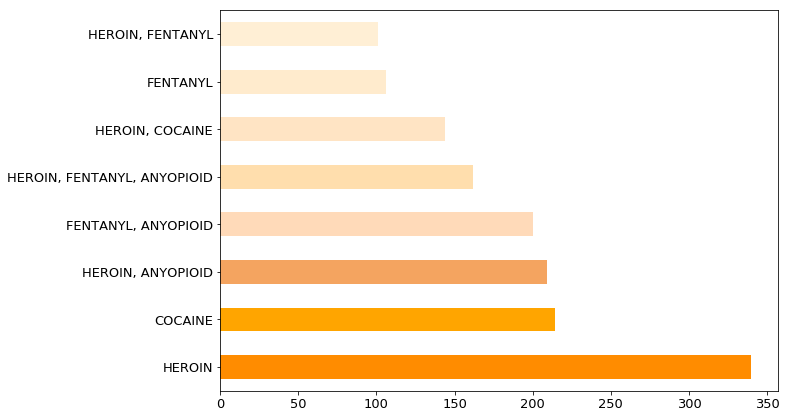

In [57]:
drugs_used_counts = add_df['drugs_used'].value_counts()
drugs_used_counts = drugs_used_counts.loc[drugs_used_counts > 100]
drugs_used_counts.plot(kind='barh', grid=0, figsize=(10,7), color=['darkorange', 'orange', 'sandybrown', 'peachpuff', 'navajowhite', 'bisque', 'blanchedalmond', 'papayawhip'], fontsize=13);

In [58]:
drugs_used_counts.loc[drugs_used_counts > 100]


HEROIN                         340
COCAINE                        214
HEROIN, ANYOPIOID              209
FENTANYL, ANYOPIOID            200
HEROIN, FENTANYL, ANYOPIOID    162
HEROIN, COCAINE                144
FENTANYL                       106
HEROIN, FENTANYL               101
Name: drugs_used, dtype: int64

# Age as an explanatory variable?

We will group 'Age' into bins of range 5 to create a population pyramid to get a better understanding of the demographic.

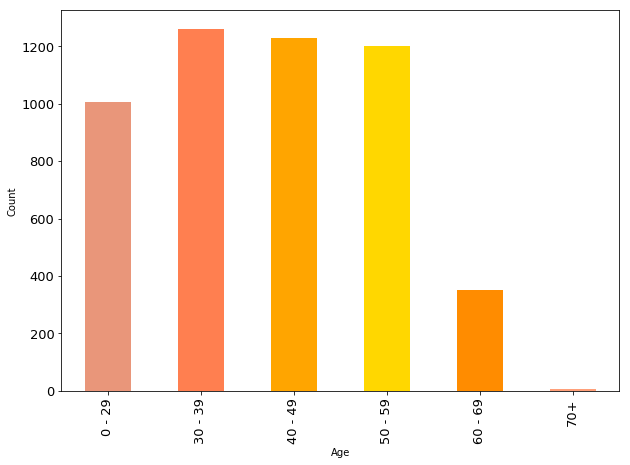

Age
30 - 39    1262
40 - 49    1229
50 - 59    1202
0 - 29     1006
60 - 69     352
70+           7
Name: Age, dtype: int64

In [59]:
#Age graph grouped into a population pyramid for an overview
bins = pd.cut(add_df['Age'], [0, 29, 39, 49,59, 69, 70], labels = ['0 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70+'])
add_df_Age = add_df.groupby(bins)['Age'].agg('count')
add_df_Age.plot(kind='bar', figsize = (10,7), fontsize=13, color = ['darksalmon', 'coral', 'orange', 'gold', 'darkorange', 'lightsalmon']);
plt.ylabel('Count', fontsize=10)
plt.show()
add_df_Age.sort_values(ascending = False)

In [60]:
# Count differences in Sex

add_df.groupby('Sex')['Age'].count()

Sex
FEMALE     1320
MALE       3767
UNKNOWN       1
Name: Age, dtype: int64

In [61]:
# Count differences in Sex by percentage

def percentage (part, whole):
    return 100 * float(part)/float(whole)

percentfemale = percentage (1320, 5087)
percentmale = percentage (3767, 5087)

print('% of Male:', percentmale, '% of Female:', percentfemale)

% of Male: 74.05150383330057 % of Female: 25.94849616669943


In [62]:
# Locating subject with Sex not defined

SexUnknownloc = np.where(add_df['Sex'] == 'UNKNOWN')
SexUnknownloc

(array([4122], dtype=int64),)

In [63]:
# Dropping subject with Sex not defined

add_df.drop(add_df.index[4122], inplace=True)

In [64]:
# Pivot Table, grouped by Sex and Age 

bins = pd.cut(add_df['Age'], [0, 29, 39, 49, 59, 69, 70], labels = ['0 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70+'])
sex_age = add_df.pivot_table('Age', index = bins, columns = 'Sex', aggfunc='count')
sex_age

Sex,FEMALE,MALE
Age,,
0 - 29,269,737
30 - 39,273,989
40 - 49,334,895
50 - 59,347,855
60 - 69,84,267
70+,2,5


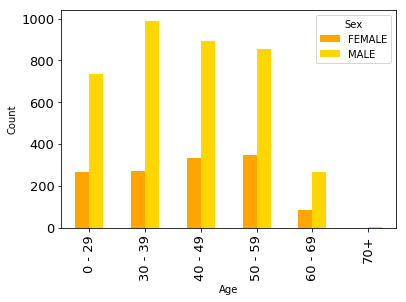

In [65]:
# Plotting age group counts for Male & Female

sex_age.plot(kind='bar', figsize = (6,4), fontsize=13, color = ['orange', 'gold'])
plt.ylabel('Count', fontsize=10)
plt.show()

In [66]:
# Changes in Age of Male & Female over time

yrsex = add_df.pivot_table('Age', index = 'Year', columns = 'Sex', aggfunc = 'mean');
yrsex

Sex,FEMALE,MALE
Year,,
2012,42.020619,40.302326
2013,42.871429,40.794286
2014,41.993976,41.419023
2015,44.136842,41.652985
2016,41.730435,42.140556
2017,42.329457,41.517375
2018,42.543933,42.799742


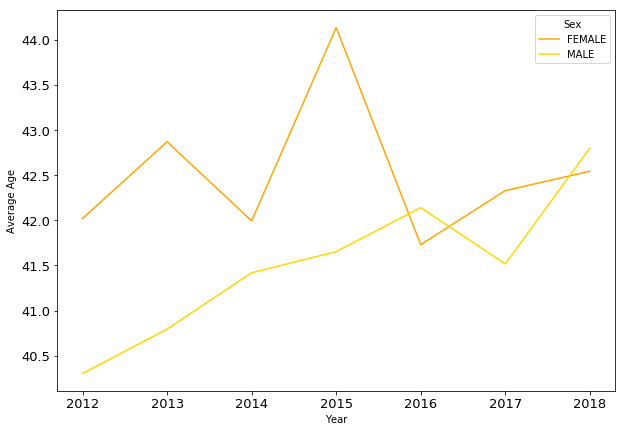

In [67]:
# Plotting the changes in Age of Male & Female over time

yrsex.plot(kind='line', figsize = (10,7), fontsize = 13, color = ['orange', 'gold'])
plt.ylabel('Average Age', fontsize = 10)
plt.show()

In [68]:
# Changes in Male & Female count over time

yrsex2 = add_df.groupby(['Year', 'Sex'])['Sex'].count();
yrsex2

Year  Sex   
2012  FEMALE     97
      MALE      258
2013  FEMALE    140
      MALE      350
2014  FEMALE    166
      MALE      389
2015  FEMALE    190
      MALE      536
2016  FEMALE    230
      MALE      683
2017  FEMALE    258
      MALE      777
2018  FEMALE    239
      MALE      774
Name: Sex, dtype: int64

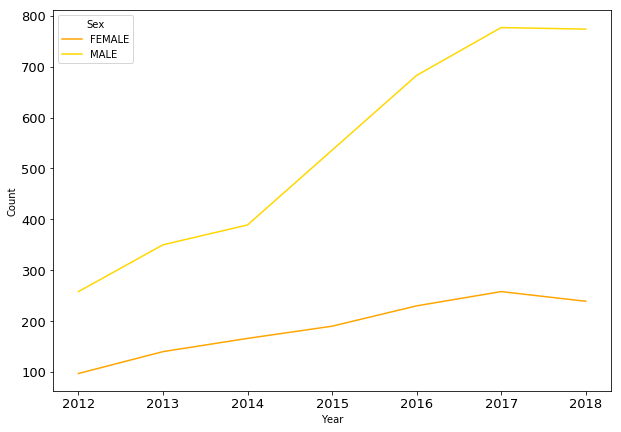

In [69]:
# Plotting the changes in Male & Female count over time

add_df.groupby(['Year', 'Sex'])['Sex'].count().unstack().plot(figsize = (10, 7), fontsize = 13, color = ['orange', 'gold'])
plt.ylabel('Count', fontsize=10)
plt.show()

# Race as an explanatory variable?

In [70]:
# Determine number of columns in clean dataset add_df
add_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5087 entries, 0 to 5087
Data columns (total 40 columns):
Date                      5087 non-null object
new_date                  5087 non-null datetime64[ns]
Year                      5087 non-null int64
Month                     5087 non-null object
day_of_week               5087 non-null object
Holiday                   155 non-null object
Age                       5087 non-null float64
Sex                       5087 non-null object
Race                      5087 non-null object
ResidenceCity             4920 non-null object
ResidenceState_update     4852 non-null object
DeathCity                 5087 non-null object
Location                  5067 non-null object
LocationifOther           588 non-null object
DescriptionofInjury       4310 non-null object
Heroin                    2525 non-null object
Cocaine                   1514 non-null object
Fentanyl                  2225 non-null object
FentanylAnalogue          388 non-null ob

In [71]:
add_df.shape

(5087, 40)

In [72]:
# Count of deaths by Race 
race_counts = add_df['Race'].value_counts()
race_counts

WHITE                     4000
HISPANIC, WHITE            560
BLACK                      433
HISPANIC, BLACK             24
UNKNOWN                     23
ASIAN, OTHER                18
ASIAN INDIAN                14
OTHER                       11
CHINESE                      2
HAWAIIAN                     1
NATIVE AMERICAN, OTHER       1
Name: Race, dtype: int64

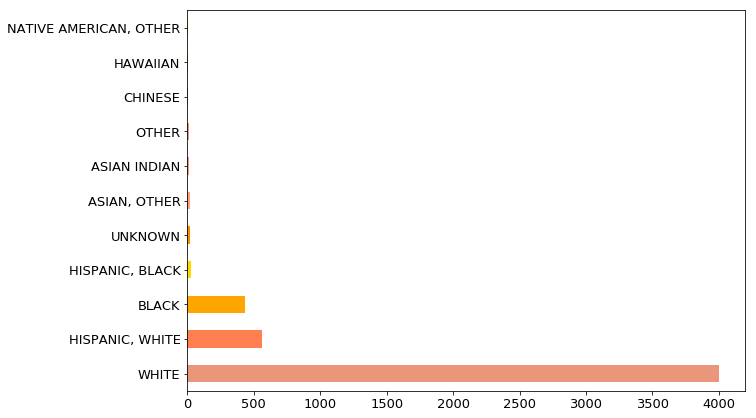

In [73]:
# Visualization of death by Race
race_counts.plot(kind='barh', figsize=(10,7), color=['darksalmon', 'coral', 'orange', 'gold', 'darkorange', 'lightsalmon'], fontsize=13);
plt.show()

In [74]:
# Cross analysis with Other Variables
# Determine count, min, mean, max of Age by Race & Sex

is_top_race = (add_df['Race'] == 'WHITE') | (add_df['Race'] == 'HISPANIC, WHITE') | (add_df['Race'] == 'BLACK')
add_df_by_top_race = add_df[is_top_race]

# add_df_by_top_race_count = add_df_by_top_race['Race'].value_counts()
# add_df_by_top_race_count

In [75]:
add_df_by_top_race.groupby(['Race','Sex'])['Age'].agg(['count','min','mean','max'])

count   min       mean   max
Race            Sex                                 
BLACK           FEMALE    112  19.0  46.142857  70.0
                MALE      321  20.0  46.700935  75.0
HISPANIC, WHITE FEMALE     98  21.0  41.010204  72.0
                MALE      462  17.0  42.870130  87.0
WHITE           FEMALE   1089  14.0  42.399449  81.0
                MALE     2911  15.0  41.090003  75.0

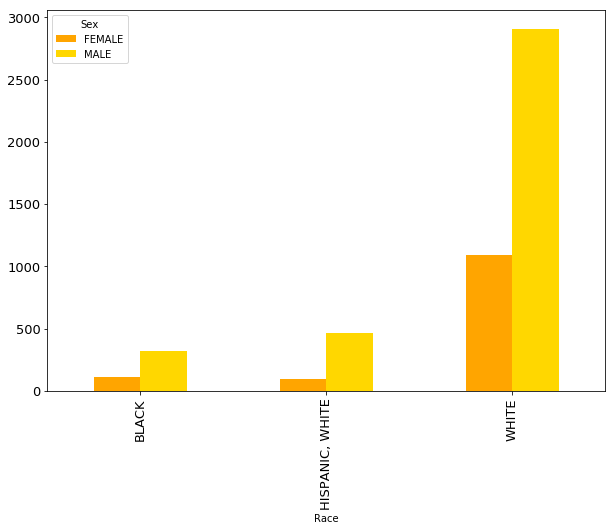

In [76]:
# add_df_by_top_race.columns

race_sex = add_df_by_top_race.pivot_table('Age',index ='Race', columns = 'Sex', aggfunc='count')
# race_sex
race_sex.plot(kind='bar', figsize = (10,7), fontsize=13, color = ['orange', 'gold'])

In [77]:
# Cross analysis with Other Variables
# Determine count,mean of Age by Race & cleaned_location

add_df_by_top_race.groupby(['Race','cleaned_location'])['Age'].agg(['count','mean'])

count       mean
Race            cleaned_location                          
BLACK           OTHER                        52  44.057692
                RESIDENCE                   190  47.015789
                SUPERVISED CARE/HOSPITAL    191  46.780105
HISPANIC, WHITE OTHER                        70  39.800000
                RESIDENCE                   274  43.131387
                SUPERVISED CARE/HOSPITAL    216  42.689815
WHITE           OTHER                       405  40.390123
                RESIDENCE                  2407  42.393436
                SUPERVISED CARE/HOSPITAL   1188  39.888047

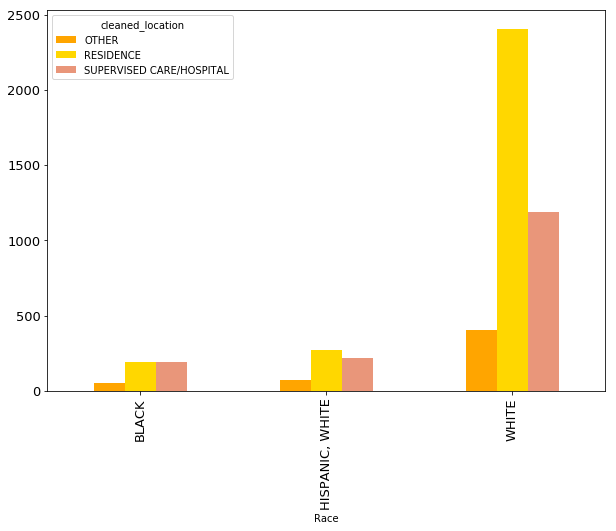

In [78]:
race_cleaned_location = add_df_by_top_race.pivot_table('Age',index ='Race', columns = 'cleaned_location', aggfunc='count')
# race_cleaned_location
race_cleaned_location.plot(kind='bar', figsize = (10,7), fontsize=13, color = ['orange', 'gold','darksalmon'])

In [79]:
# Cross analysis with Other Variables
# Determine count, min, mean, max of Age by Year & Race

# add_df['Year'].unique()

add_df_by_top_race.groupby(['Year','Race'])['Age'].agg(['count','mean'])

count       mean
Year Race                             
2012 BLACK               38  47.763158
     HISPANIC, WHITE     38  42.947368
     WHITE              274  39.718978
2013 BLACK               44  47.409091
     HISPANIC, WHITE     52  44.865385
     WHITE              388  40.270619
2014 BLACK               27  44.518519
     HISPANIC, WHITE     54  41.870370
     WHITE              468  41.361111
2015 BLACK               46  46.326087
     HISPANIC, WHITE     76  42.250000
     WHITE              593  42.067454
2016 BLACK               86  47.639535
     HISPANIC, WHITE     98  41.795918
     WHITE              711  41.421941
2017 BLACK               88  46.113636
     HISPANIC, WHITE    113  43.150442
     WHITE              813  41.233702
2018 BLACK              104  45.865385
     HISPANIC, WHITE    129  41.984496
     WHITE              753  42.498008

In [80]:
# Further analysis to determine YoY for each race

df_top_race = add_df_by_top_race.groupby(['Year','Race'])['Age'].count().reset_index()

df_top_race.rename(columns={'Age':'Count'}, inplace = True)
df_top_race = df_top_race.set_index('Year')
df_top_race ['YoY'] = df_top_race['Count'].pct_change(3)
df_top_race

,Race,Count,YoY
Year,,,
2012,BLACK,38,NaN
2012,"HISPANIC, WHITE",38,NaN
2012,WHITE,274,NaN
2013,BLACK,44,0.157895
2013,"HISPANIC, WHITE",52,0.368421
2013,WHITE,388,0.416058
2014,BLACK,27,-0.386364
2014,"HISPANIC, WHITE",54,0.038462
2014,WHITE,468,0.206186


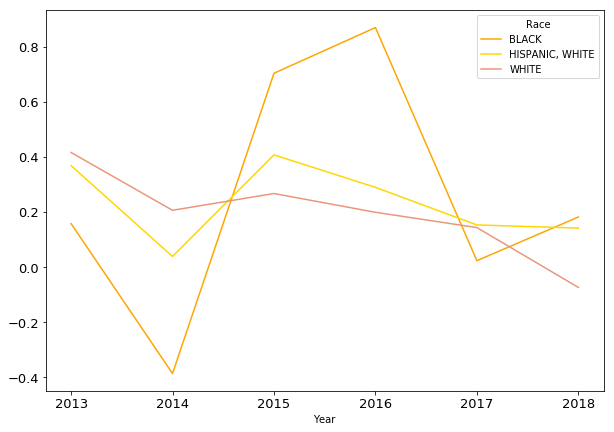

In [81]:
# Plot 'YoY'
df_top_race.fillna(0)
df_top_race_yoy = df_top_race.pivot_table('YoY',index ='Year', columns = 'Race')
df_top_race_yoy.plot(kind='line', figsize = (10,7), fontsize=13, color = ['orange', 'gold','darksalmon'])

# Location as an explanatory variable?

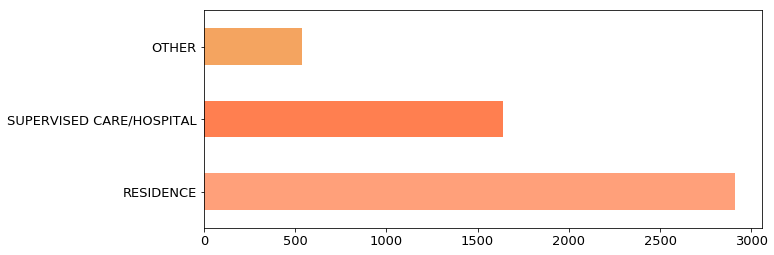

In [82]:
#Count of the locations that individuals died at
location_counts = add_df['cleaned_location'].value_counts()
location_counts.plot(kind='barh', figsize=(10,4),label=True, color=['lightsalmon', 'coral', 'sandybrown', 'gold', 'darkorange', 'orange', 'darksalmon', 'mistyrose', 'lightcoral', 'darksalmon'], fontsize=13);
plt.show()

In [83]:
print(add_df.groupby(['cleaned_location','Sex'])['Age'].mean())

cleaned_location          Sex   
OTHER                     FEMALE    40.586538
                          MALE      40.685912
RESIDENCE                 FEMALE    43.850727
                          MALE      42.322970
SUPERVISED CARE/HOSPITAL  FEMALE    40.753813
                          MALE      41.101781
Name: Age, dtype: float64


In [84]:
#examination of age vs location
location_age = add_df.pivot_table('Age', index = bins, columns = 'cleaned_location', aggfunc='count',dropna=True,fill_value=0)
#location_age
location_age_pct = pd.crosstab(bins,add_df['cleaned_location']).apply(lambda r: r/r.sum(), axis=1)
location_age_pct = location_age_pct[:5]

cleaned_location     OTHER  RESIDENCE  SUPERVISED CARE/HOSPITAL
Age                                                            
0 - 29            0.114314   0.518887                  0.366799
30 - 39           0.121236   0.561807                  0.316957
40 - 49           0.103336   0.561432                  0.335232
50 - 59           0.094010   0.610649                  0.295341
60 - 69           0.068376   0.669516                  0.262108


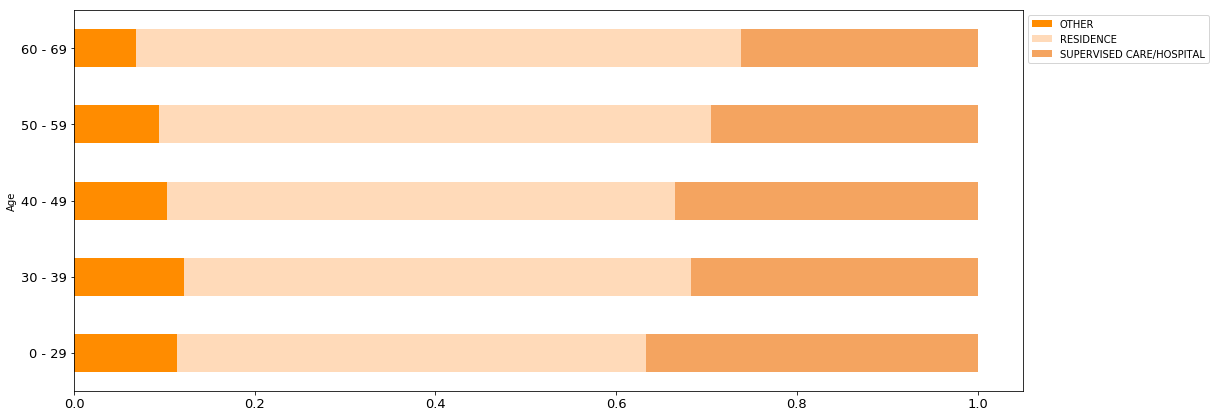

In [85]:
print(location_age_pct)
location_age_pct.plot(kind='barh', stacked=True, figsize = (17,7), fontsize=13, color=['darkorange', 'peachpuff', 'sandybrown']).legend(bbox_to_anchor=(1, 1))

Sex                         FEMALE      MALE
cleaned_location                            
OTHER                     0.193669  0.806331
RESIDENCE                 0.259959  0.740041
SUPERVISED CARE/HOSPITAL  0.280220  0.719780


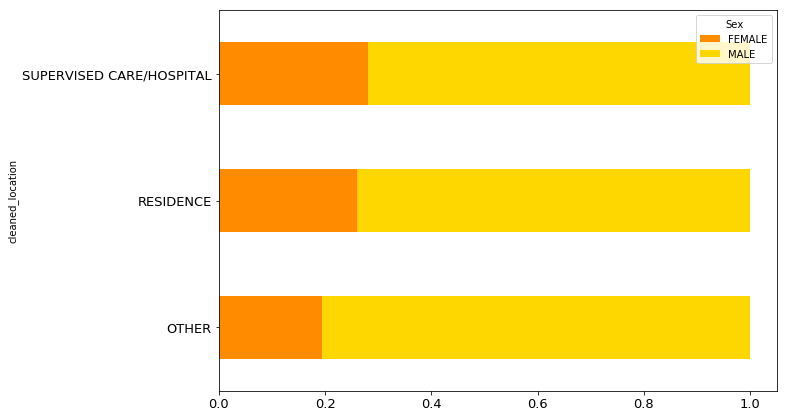

In [86]:
sex_location_pct = pd.crosstab(add_df['cleaned_location'],add_df.Sex).apply(lambda r: r/r.sum(), axis=1)
print(sex_location_pct)
sex_location_pct.plot(kind='barh', stacked=True, figsize = (10,7), fontsize=13, color=['darkorange', 'gold'])

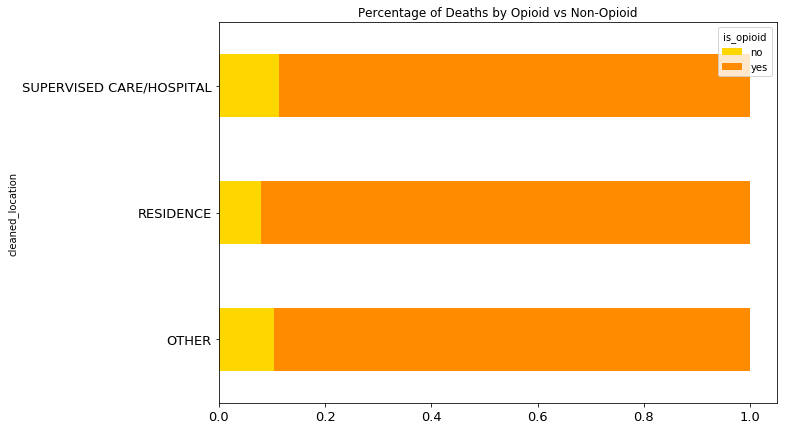

In [87]:
opioid_location_pct = pd.crosstab(add_df['cleaned_location'],add_df.is_opioid).apply(lambda r: r/r.sum(), axis=1)
opioid_location_pct.plot(kind='barh',title='Percentage of Deaths by Opioid vs Non-Opioid', stacked=True, figsize = (10,7), fontsize=13, color=['gold', 'darkorange', 'orange', 'darksalmon', 'mistyrose', 'lightcoral', 'darksalmon'])

In [88]:
#deaths by city per capita
top_cities = add_df.groupby(['DeathCity'])['DeathCity'].count().sort_values(ascending=False)#[:10]

df_top_cities = pd.DataFrame({'DeathCity':top_cities.index, 'Deaths':top_cities.values})

df_top_cities = pd.merge(df_top_cities,connecticut,left_on='DeathCity', right_on='Town', how='left')

opioid_cities = add_df.groupby(['DeathCity','is_opioid'])['is_opioid'].count().sort_values(ascending=False)
opioid_cities = opioid_cities.drop(labels='no',level=1)
df_opioid_cities = pd.DataFrame(opioid_cities)
df_top_cities = pd.merge(df_top_cities,df_opioid_cities,on='DeathCity', how='left')

df_top_cities.drop(['Town'],axis=1)

df_top_cities['PerCapita']=(df_top_cities['Deaths']/df_top_cities['Population'])*100
df_top_cities['%_Opioid_Deaths']=(df_top_cities['is_opioid']/df_top_cities['Deaths'])*100

In [89]:
#df_top_cities = df_top_cities.drop(['Town'],axis=1)
df_top_cities['%_Opioid_Deaths'] = df_top_cities['%_Opioid_Deaths'].round(2)
df_top_citiesnonull = df_top_cities.dropna()
df_top_citiesnonull.sort_values(by=['Population'],ascending=True)[:10]

,DeathCity,Deaths,Town,Population,is_opioid,PerCapita,%_Opioid_Deaths
113,MASHANTUCKET,5,MASHANTUCKET,299.0,4.0,1.672241,80.00
211,GROTON LONG POINT,1,GROTON LONG POINT,518.0,1.0,0.193050,100.00
220,NORFOLK,1,NORFOLK,553.0,1.0,0.180832,100.00
56,SHARON,14,SHARON,729.0,12.0,1.920439,85.71
182,BANTAM,1,BANTAM,759.0,1.0,0.131752,100.00
142,STONINGTON,3,STONINGTON,929.0,3.0,0.322928,100.00
107,BROOKLYN,5,BROOKLYN,981.0,4.0,0.509684,80.00
146,GALES FERRY,3,GALES FERRY,1162.0,3.0,0.258176,100.00
218,NEW PRESTON,1,NEW PRESTON,1182.0,1.0,0.084602,100.00
199,WAUREGAN,1,WAUREGAN,1205.0,1.0,0.082988,100.00


In [90]:
#deaths by city per capita
all_cities = add_df.groupby(['DeathCity'])['DeathCity'].count().sort_values(ascending=False)

df_all_cities = pd.DataFrame({'DeathCity':all_cities.index, 'Deaths':all_cities.values})

df_all_cities = pd.merge(df_all_cities,connecticut,left_on='DeathCity', right_on='Town', how='left')

opioid_cities = add_df.groupby(['DeathCity','is_opioid'])['is_opioid'].count().sort_values(ascending=False)
opioid_cities = opioid_cities.drop(labels='no',level=1)
df_opioid_cities = pd.DataFrame(opioid_cities)
df_all_cities = pd.merge(df_all_cities,df_opioid_cities,on='DeathCity', how='left')

df_all_cities.drop(['Town'],axis=1)

df_all_cities['PerCapita']=(df_all_cities['Deaths']/df_all_cities['Population'])*100
df_all_cities['%_Opioid_Deaths']=(df_all_cities['is_opioid']/df_all_cities['Deaths'])*100

In [91]:
df_all_cities.sort_values(by='PerCapita',ascending=False)[:10].drop(['Town'],axis=1)

,DeathCity,Deaths,Population,is_opioid,PerCapita,%_Opioid_Deaths
56,SHARON,14,729.0,12.0,1.920439,85.714286
113,MASHANTUCKET,5,299.0,4.0,1.672241,80.000000
25,NEW MILFORD,44,6523.0,41.0,0.674536,93.181818
41,WATERTOWN,21,3574.0,18.0,0.587577,85.714286
53,EAST HAMPTON,15,2691.0,11.0,0.557414,73.333333
107,BROOKLYN,5,981.0,4.0,0.509684,80.000000
19,DERBY,64,12902.0,57.0,0.496047,89.062500
8,NEW LONDON,137,27620.0,124.0,0.496017,90.510949
77,NEWTOWN,9,1941.0,9.0,0.463679,100.000000
0,HARTFORD,560,124775.0,500.0,0.448808,89.285714


C:\Users\em920\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


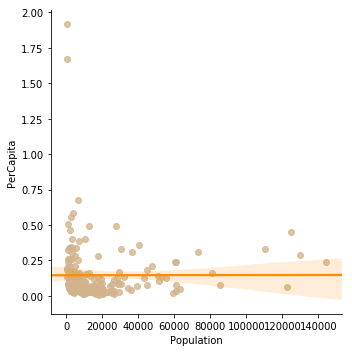

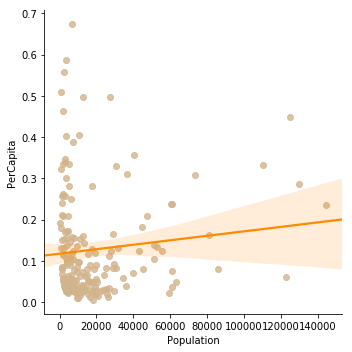

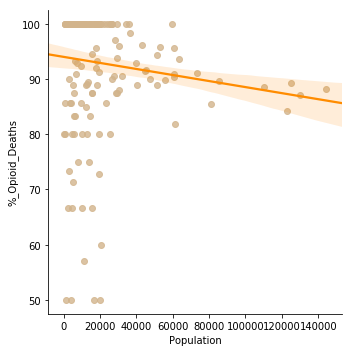

In [92]:
df_top_cities_nona = df_top_cities.dropna()
df_top_cities_nona_filtered = df_top_cities_nona.loc[df_top_cities_nona['PerCapita']<=1.00]

#Scatter Plot of per-capital deaths vs the population of communities
sns.lmplot(y='PerCapita',x='Population',data=df_top_cities_nona,line_kws={'color': 'darkorange'},scatter_kws={'color': 'tan'})
#Scatter Plot of per-capital deaths vs the population of communities with outliers filtered out
sns.lmplot(y='PerCapita',x='Population',data=df_top_cities_nona_filtered,line_kws={'color': 'darkorange'},scatter_kws={'color': 'tan'})
#Scatter Plot of % opioid related deaths vs the population of communities
sns.lmplot(y='%_Opioid_Deaths',x='Population',data=df_top_cities_nona,line_kws={'color': 'darkorange'},scatter_kws={'color': 'tan'})

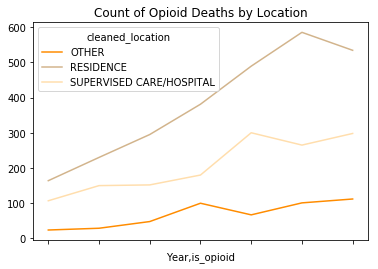

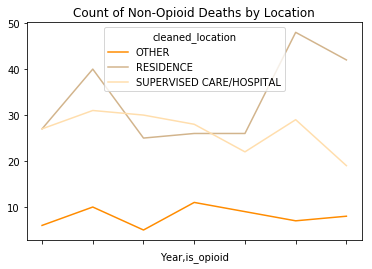

In [93]:
opioid_by_year = add_df.pivot_table('Age',index = ['Year','is_opioid'], columns = ['cleaned_location'], aggfunc='count',fill_value=0)#.apply(lambda r: (r/r.sum())*100, axis=1),2)

yesopioid_by_year=opioid_by_year.drop(labels='no',level=1)
yesopioid_by_year.plot(title='Count of Opioid Deaths by Location', color=['darkorange', 'tan', 'navajowhite'])

nonopioid_by_year=opioid_by_year.drop(labels='yes',level=1)
nonopioid_by_year.plot(title='Count of Non-Opioid Deaths by Location', color=['darkorange', 'tan', 'navajowhite'])

cleaned_location  OTHER  RESIDENCE  SUPERVISED CARE/HOSPITAL
Year                                                        
2012                 30        191                       134
2013                 39        270                       181
2014                 53        320                       182
2015                111        407                       208
2016                 76        515                       322
2017                108        633                       294
2018                120        576                       317


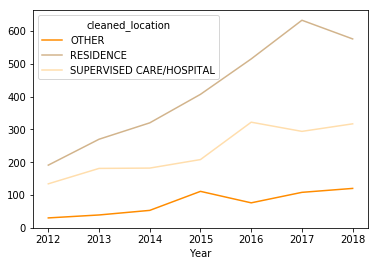

In [94]:
#yrLocation = add_df.groupby(['cleaned_location','Year'])['cleaned_location'].count().reset_index(name="Count")

#yrLocation = add_df.pivot_table('cleaned_location', index=['cleaned_location'],columns=['Year'],aggfunc='count')
yrLocation = add_df.pivot_table('Age', index = 'Year', columns = 'cleaned_location', aggfunc='count',dropna=True,fill_value=0)

print(yrLocation)
yrLocation.plot(color=['darkorange', 'tan', 'navajowhite'])


# Cross Analysis
Analyzing the relationship of age, race and sex

In [95]:
#Add age class column based on age values
def func(row):
    if row['Age'] < 30:
        return '0-29'
    elif row['Age'] >= 30 and row['Age'] < 40:
        return '30-39'
    elif row['Age'] >= 40 and row['Age'] < 50:
        return '40-49'
    elif row['Age'] >= 50 and row['Age'] < 60:
        return '50-59'
    elif row['Age'] >= 60 and row['Age'] < 70:
        return '60-69'
    elif row['Age'] >= 70:
        return '70+'

add_df['ageClass'] = add_df.apply(func, axis=1)

add_df.head()

,Date,new_date,Year,Month,day_of_week,Holiday,Age,Sex,Race,ResidenceCity,...,AnyOpioid,DeathCoordinates,DeathCityExtracted,ResidenceCityExtracted,ResidenceCoordinates,Population,cleaned_location,drugs_used,is_opioid,ageClass
0,01/01/2012 12:00:00 AM,2012-01-01,2012,JAN,SUN,NaN,35.0,MALE,WHITE,HEBRON,...,NaN,"(41.658069, -72.366324)",HEBRON,HEBRON\r,"(43.694742, -71.808963)",9686.0,RESIDENCE,"HEROIN, COCAINE",yes,30-39
1,01/03/2012 12:00:00 AM,2012-01-03,2012,JAN,TUE,NaN,41.0,MALE,WHITE,BRISTOL,...,NaN,"(41.673037, -72.945791)",BRISTOL,BRISTOL\r,"(41.673037, -72.945791)",60477.0,SUPERVISED CARE/HOSPITAL,"HEROIN, BENZODIAZEPINE",yes,40-49
2,01/04/2012 12:00:00 AM,2012-01-04,2012,JAN,WED,NaN,61.0,MALE,BLACK,DANBURY,...,NaN,"(41.393666, -73.451539)",DANBURY,DANBURY\r,"(41.393666, -73.451539)",80893.0,SUPERVISED CARE/HOSPITAL,COCAINE,no,60-69
3,01/05/2012 12:00:00 AM,2012-01-05,2012,JAN,THUR,NaN,51.0,MALE,WHITE,STRATFORD,...,NaN,"(41.179195, -73.189476)",BRIDGEPORT,STRATFORD\r,"(41.200888, -73.131323)",144229.0,RESIDENCE,METHADONE,yes,50-59
4,01/07/2012 12:00:00 AM,2012-01-07,2012,JAN,SAT,NaN,45.0,MALE,WHITE,HARTFORD,...,NaN,"(41.765775, -72.673356)",HARTFORD,HARTFORD\r,"(41.765775, -72.673356)",124775.0,RESIDENCE,HEROIN,yes,40-49


In [96]:
#Subsetting the dataframe for analysis and visualizations
addSub = add_df[['Age', 'ageClass', 'Race', 'Sex', 'Year']]
addSub.head()

,Age,ageClass,Race,Sex,Year
0,35.0,30-39,WHITE,MALE,2012
1,41.0,40-49,WHITE,MALE,2012
2,61.0,60-69,BLACK,MALE,2012
3,51.0,50-59,WHITE,MALE,2012
4,45.0,40-49,WHITE,MALE,2012


### Analyzing the three variables

In [97]:
#Explore the distribution of observations for each group in the race column
addSub.groupby('Sex')['Sex'].count()

Sex
FEMALE    1320
MALE      3767
Name: Sex, dtype: int64

In [98]:
#Explore the distribution of observations for each group in the race column
addSub.groupby('Race')['Race'].count()

Race
ASIAN INDIAN                14
ASIAN, OTHER                18
BLACK                      433
CHINESE                      2
HAWAIIAN                     1
HISPANIC, BLACK             24
HISPANIC, WHITE            560
NATIVE AMERICAN, OTHER       1
OTHER                       11
UNKNOWN                     23
WHITE                     4000
Name: Race, dtype: int64

Reviewing the groupby for sex and race indicate some groups have minimal records:
* unknown from the sex column
* all but black, hispanic/white, and white from the race column

The dataframe is filtered to remove groups from the sex and race columns that do not have a significant number of records

In [99]:
#Remove all occurances of 'unknown' from the sex column
addSub = addSub[addSub.Sex != 'UNKNOWN']

In [100]:
#Remove all occurances other than 'black', 'hispanic, white', and 'white' from the race column
races = ['BLACK', 'HISPANIC, WHITE', 'WHITE']
addSub = addSub[addSub.Race.isin(races)]

## Performing cross analysis between multiple columns

In [101]:
#Explore the distribution of observations for each group in the age class and race column
addSub.groupby(['Race', 'ageClass'])['Race'].count()

Race             ageClass
BLACK            0-29          49
                 30-39         80
                 40-49        107
                 50-59        135
                 60-69         57
                 70+            5
HISPANIC, WHITE  0-29          89
                 30-39        129
                 40-49        191
                 50-59        118
                 60-69         26
                 70+            7
WHITE            0-29         838
                 30-39       1030
                 40-49        913
                 50-59        931
                 60-69        264
                 70+           24
Name: Race, dtype: int64

In [102]:
#Explore the distribution of observations for each group in the sex and race column
addSub.groupby(['Sex', 'Race'])['Race'].count()

Sex     Race           
FEMALE  BLACK               112
        HISPANIC, WHITE      98
        WHITE              1089
MALE    BLACK               321
        HISPANIC, WHITE     462
        WHITE              2911
Name: Race, dtype: int64

In [103]:
#Explore the distribution of observations for each group in the age class, sex and race column
addSub.groupby(['Sex', 'Race', 'ageClass'])['Race'].count()

Sex     Race             ageClass
FEMALE  BLACK            0-29         14
                         30-39        16
                         40-49        35
                         50-59        34
                         60-69        12
                         70+           1
        HISPANIC, WHITE  0-29         20
                         30-39        24
                         40-49        29
                         50-59        20
                         60-69         4
                         70+           1
        WHITE            0-29        227
                         30-39       229
                         40-49       265
                         50-59       289
                         60-69        68
                         70+          11
MALE    BLACK            0-29         35
                         30-39        64
                         40-49        72
                         50-59       101
                         60-69        45
                       

In [104]:
#Analyze the age statistics (min, mean, median, and max) for the race column
print("Minimum age by race")
print(addSub.groupby('Race')['Age'].min())  
print("")
print("Mean age by race")
print(addSub.groupby('Race')['Age'].mean())
print("")
print("Median age by race")
print(addSub.groupby('Race')['Age'].median())
print("")
print("Max age by race")
print(addSub.groupby('Race')['Age'].max())

Minimum age by race
Race
BLACK              19.0
HISPANIC, WHITE    17.0
WHITE              14.0
Name: Age, dtype: float64

Mean age by race
Race
BLACK              46.556582
HISPANIC, WHITE    42.544643
WHITE              41.446500
Name: Age, dtype: float64

Median age by race
Race
BLACK              48.0
HISPANIC, WHITE    43.0
WHITE              41.0
Name: Age, dtype: float64

Max age by race
Race
BLACK              75.0
HISPANIC, WHITE    87.0
WHITE              81.0
Name: Age, dtype: float64


In [105]:
#Analyze the age statistics (min, mean, median, and max) for the sex column
print("Minimum age by sex")
print(addSub.groupby('Sex')['Age'].min())
print("")
print("Mean age by sex")
print(addSub.groupby('Sex')['Age'].mean())
print("")
print("Median age by sex")
print(addSub.groupby('Sex')['Age'].median())
print("")
print("Maximum age by sex")
print(addSub.groupby('Sex')['Age'].max())

Minimum age by sex
Sex
FEMALE    14.0
MALE      15.0
Name: Age, dtype: float64

Mean age by sex
Sex
FEMALE    42.617398
MALE      41.800217
Name: Age, dtype: float64

Median age by sex
Sex
FEMALE    44.0
MALE      41.0
Name: Age, dtype: float64

Maximum age by sex
Sex
FEMALE    81.0
MALE      87.0
Name: Age, dtype: float64


In [106]:
#Analyze the age statistics (min, mean, median, and max) for the sex and sex column
print("Minimum age by sex and race")
print(addSub.groupby(['Sex', 'Race'])['Age'].min())
print("")
print("Mean age by sex and race")
print(addSub.groupby(['Sex', 'Race'])['Age'].mean())
print("")
print("Median age by sex and race")
print(addSub.groupby(['Sex', 'Race'])['Age'].median())
print("")
print("Maximum age by sex and race")
print(addSub.groupby(['Sex', 'Race'])['Age'].max())

Minimum age by sex and race
Sex     Race           
FEMALE  BLACK              19.0
        HISPANIC, WHITE    21.0
        WHITE              14.0
MALE    BLACK              20.0
        HISPANIC, WHITE    17.0
        WHITE              15.0
Name: Age, dtype: float64

Mean age by sex and race
Sex     Race           
FEMALE  BLACK              46.142857
        HISPANIC, WHITE    41.010204
        WHITE              42.399449
MALE    BLACK              46.700935
        HISPANIC, WHITE    42.870130
        WHITE              41.090003
Name: Age, dtype: float64

Median age by sex and race
Sex     Race           
FEMALE  BLACK              48.0
        HISPANIC, WHITE    43.5
        WHITE              43.0
MALE    BLACK              49.0
        HISPANIC, WHITE    43.0
        WHITE              40.0
Name: Age, dtype: float64

Maximum age by sex and race
Sex     Race           
FEMALE  BLACK              70.0
        HISPANIC, WHITE    72.0
        WHITE              81.0
MALE    BLACK

In [107]:
#Count of deaths by year and race
yrRace = addSub.groupby(['Race','Year'])['Race'].count().reset_index(name="Count")
yrRace

,Race,Year,Count
0,BLACK,2012,38
1,BLACK,2013,44
2,BLACK,2014,27
3,BLACK,2015,46
4,BLACK,2016,86
5,BLACK,2017,88
6,BLACK,2018,104
7,"HISPANIC, WHITE",2012,38
8,"HISPANIC, WHITE",2013,52
9,"HISPANIC, WHITE",2014,54


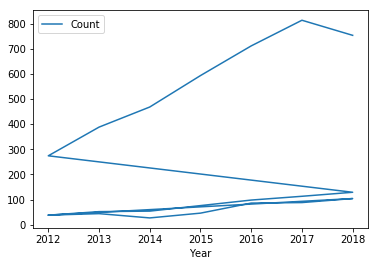

In [108]:
#Plot deaths by year (wanting to have groups by race)
yrRace.plot.line(x='Year', y='Count')

## Time series analysis 

In [109]:
#Analyze year
df_year=add_df['Year'].value_counts()
df_year=df_year.sort_index(ascending=True)

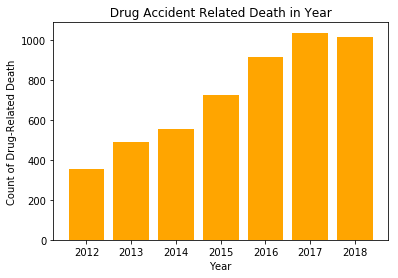

In [110]:

plt.bar(df_year.index,df_year,color='orange')
plt.ylabel('Count of Drug-Related Death')
plt.xlabel('Year')
plt.title(' Drug Accident Related Death in Year ')
plt.show()

In [111]:
#Analyze Month

df_month=pd.concat([add_df['new_date'],add_df['Month']],axis=1)
df_month['Date']=pd.to_datetime(df_month['new_date'])

df_month=df_month.set_index('Date')
df_month_sea = df_month.resample(rule='M', how='count')
df_month_sea.drop(['new_date'],axis=1,inplace=True)
df_month_sea.rename(columns={'Month':'Count of Death in Month'},inplace=True)



C:\Users\em920\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  import sys


In [112]:
# Prepare data for plot
df_month_sea.reset_index(inplace=True)
#df_month_sea.drop(['index','level_0'],axis=1,inplace=True)
df_month_sea['year'] = [d.year for d in df_month_sea.Date]
df_month_sea['month'] = [d.strftime('%b') for d in df_month_sea.Date]
years = df_month_sea['year'].unique()
df_month_sea.head()

,Date,Count of Death in Month,year,month
0,2012-01-31,31,2012,Jan
1,2012-02-29,27,2012,Feb
2,2012-03-31,24,2012,Mar
3,2012-04-30,30,2012,Apr
4,2012-05-31,28,2012,May


In [113]:
lookup={11:'Autumn',12:'Winter',1:'Winter',2:'Winter',3:'Spring',4:'Spring',5:'Spring',6:'Summer',7:'Summer',8:'Summer',9:'Autumn',10:'Autumn'}

df_month_sea['y']=df_month_sea['Date'].dt.month
#df_month_sea.drop(['index'],axis=1,inplace=True)
df_month_sea['y']=df_month_sea['y'].apply(lambda x: lookup[x])
df_month_sea.rename(columns={'y':'Season'},inplace=True)
df_month_sea.head()

,Date,Count of Death in Month,year,month,Season
0,2012-01-31,31,2012,Jan,Winter
1,2012-02-29,27,2012,Feb,Winter
2,2012-03-31,24,2012,Mar,Spring
3,2012-04-30,30,2012,Apr,Spring
4,2012-05-31,28,2012,May,Spring


In [114]:

df_season=df_month_sea.groupby(['Season'])['Count of Death in Month'].agg('sum')

df_season


Season
Autumn    1337
Spring    1231
Summer    1283
Winter    1236
Name: Count of Death in Month, dtype: int64

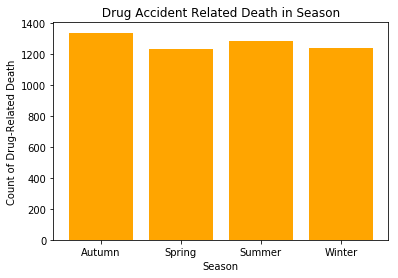

In [115]:
plt.bar(df_season.index,df_season,color='orange')
plt.ylabel('Count of Drug-Related Death')
plt.xlabel('Season')
plt.title(' Drug Accident Related Death in Season ')
plt.show()

In [116]:
df_season2=df_month_sea.groupby(['Season','year']).agg('sum')

In [117]:
df_season2.reset_index(inplace=True)
df_season2
df_season2.rename(columns={'Count of Death in Month':'Death in Season'},inplace=True)


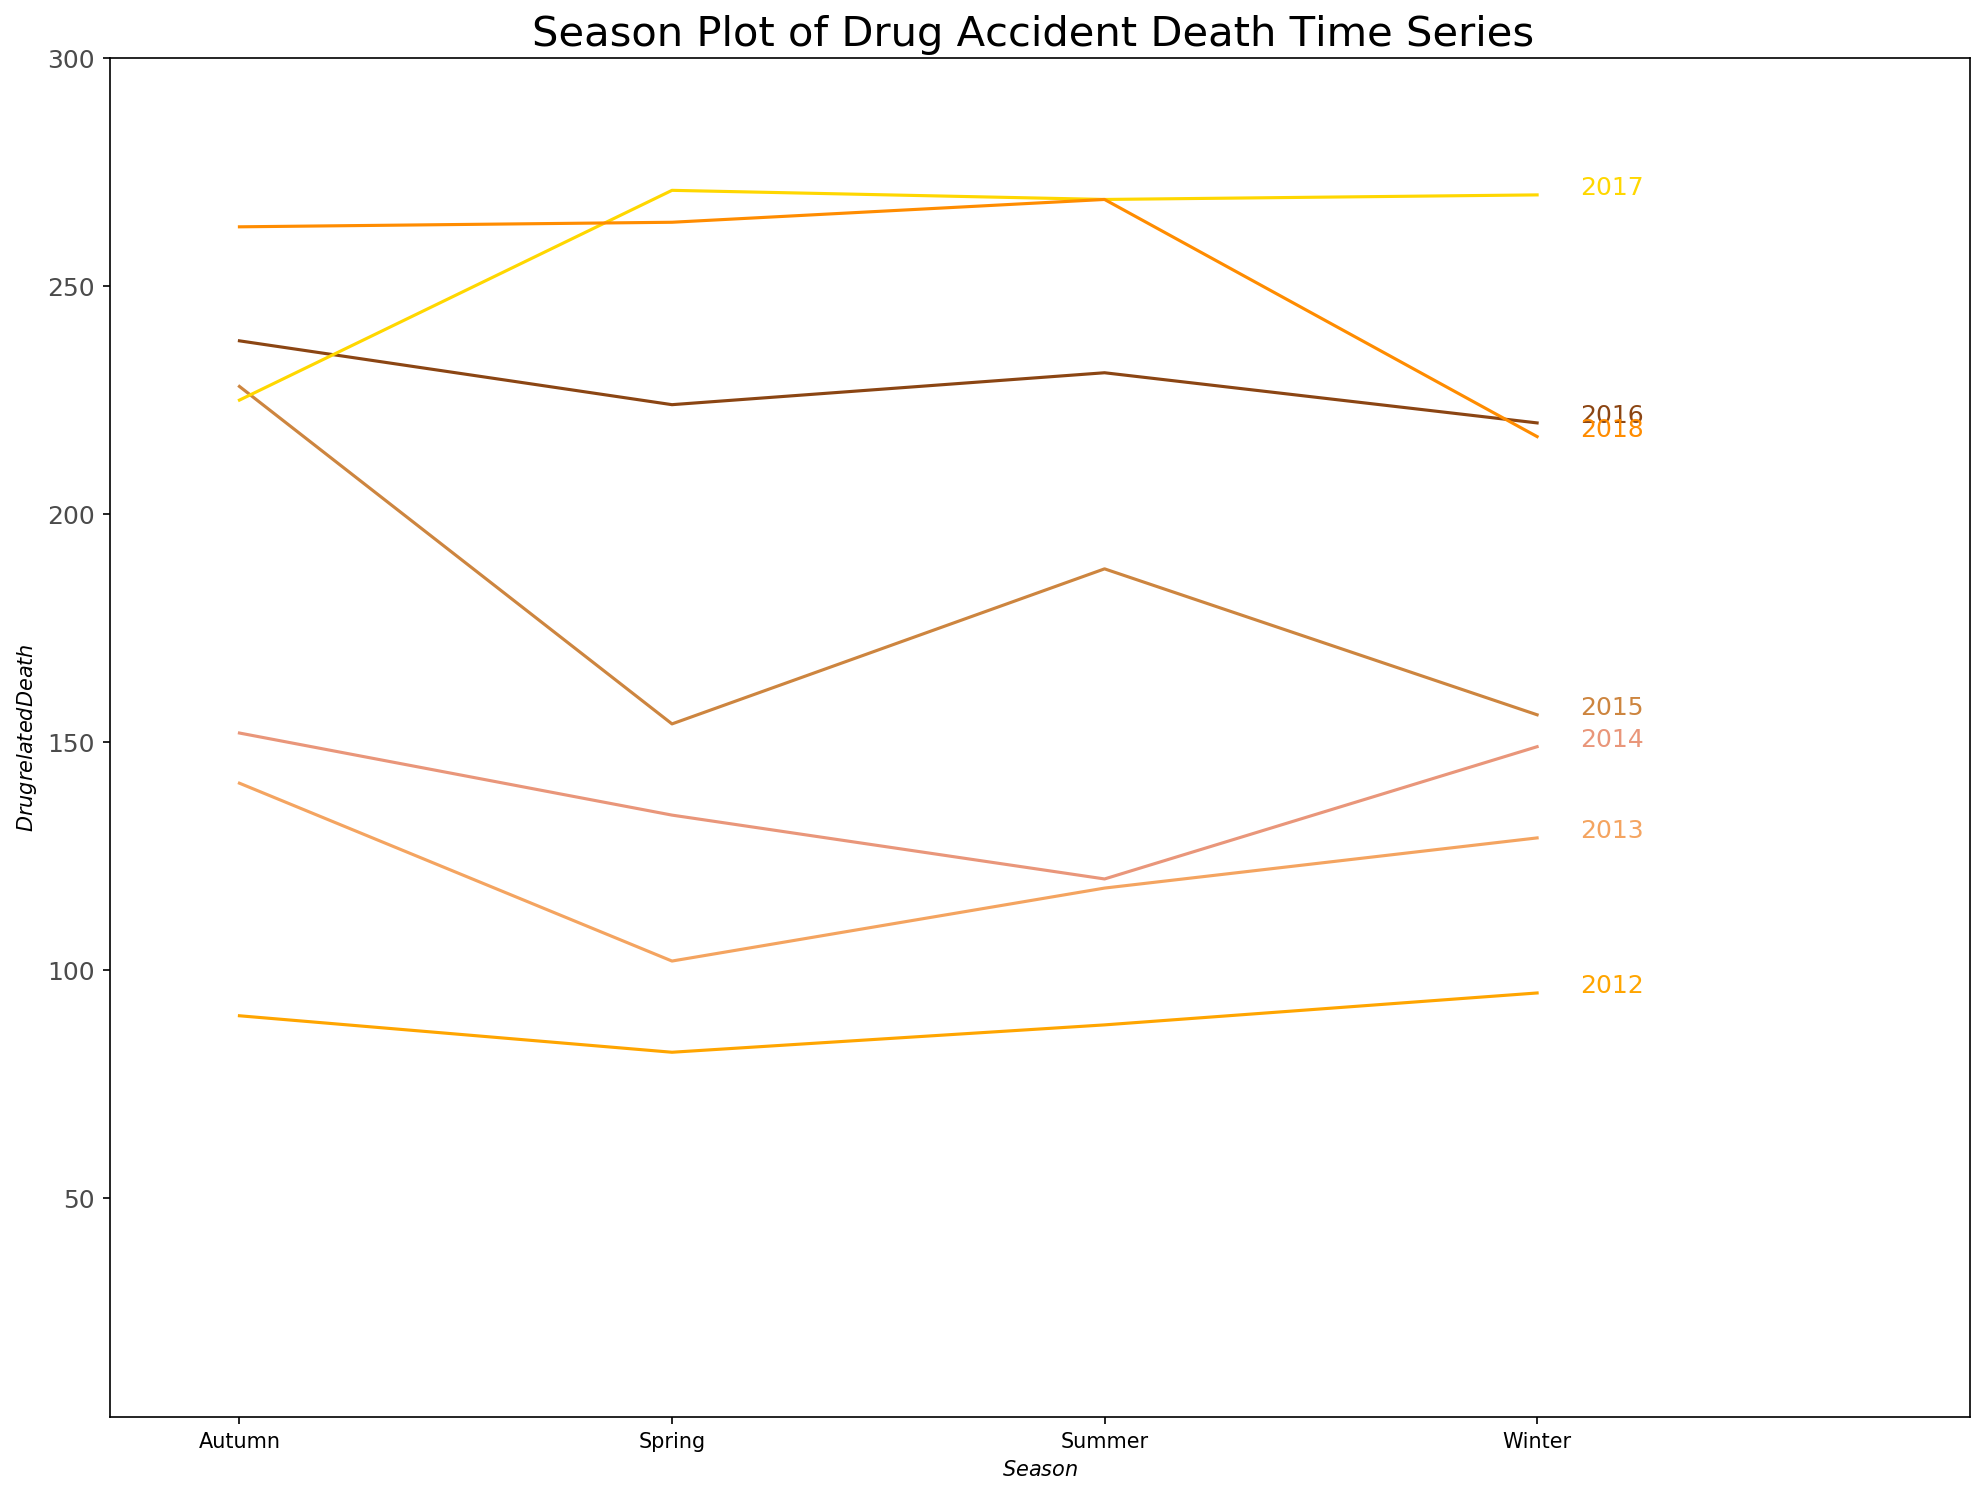

In [118]:
#prepare color
np.random.seed(100)
mycolors = np.random.choice(['darkorange', 'orange', 'sandybrown', 'saddlebrown', 'peru', 'darksalmon', 'gold'], len(years), replace=False)
# Draw Plot
plt.figure(figsize=(16,12), dpi= 150)
for i, y in enumerate(years):
    if i >= 0:        
        plt.plot('Season', 'Death in Season', data=df_season2.loc[df_season2.year==y, :], color=mycolors[i],label=y)
        plt.text(df_season2.loc[df_season2.year==y, :].shape[0]-.9, df_season2.loc[df_season2.year==y, 'Death in Season'][-1:].values[0], y, fontsize=12, color=mycolors[i])
        plt.gca().set(xlim=(-0.3, 4), ylim=(2, 300), ylabel='Drug related Deaths', xlabel='Season')
        
# Decoration
plt.gca().set(xlim=(-0.3, 4), ylim=(2, 300), ylabel='$Drug related Death$', xlabel='$Season$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Season Plot of Drug Accident Death Time Series ", fontsize=20)
plt.show()     

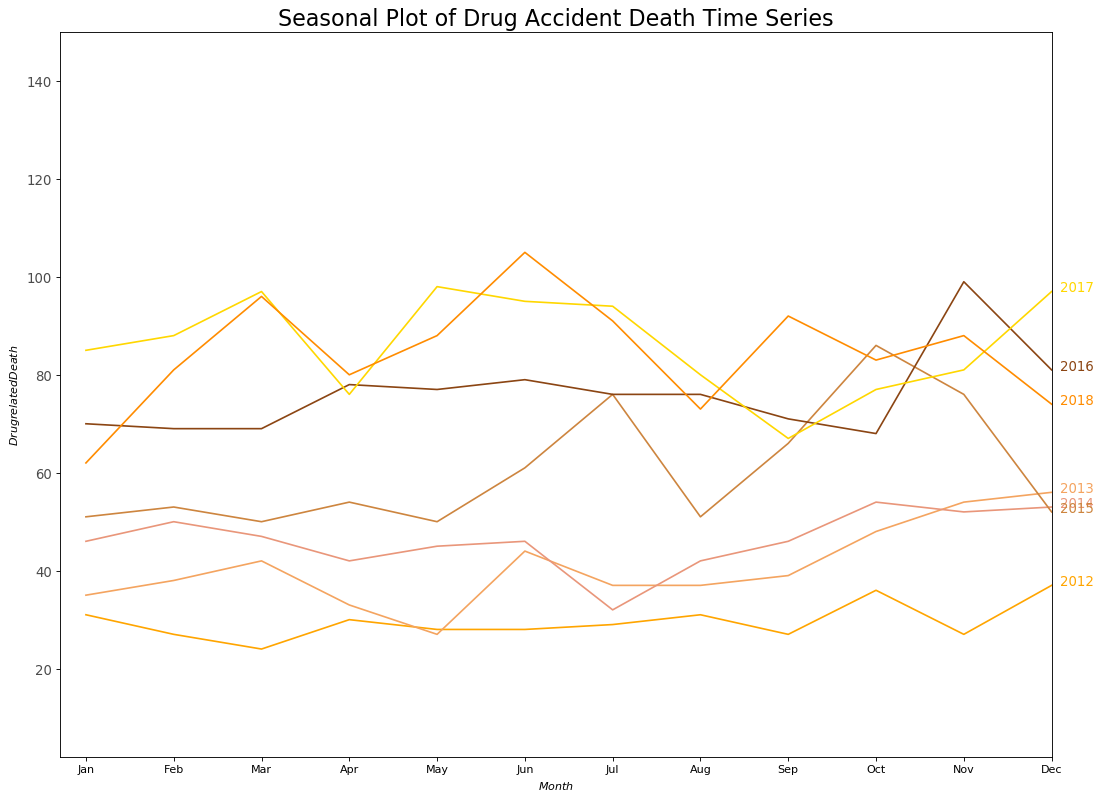

In [119]:
#plot month effect for each year
#prepare color
np.random.seed(100)
mycolors = np.random.choice(['darkorange', 'orange', 'sandybrown', 'saddlebrown', 'peru', 'darksalmon', 'gold'], len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i >= 0:        
        plt.plot('month', 'Count of Death in Month', data=df_month_sea.loc[df_month_sea.year==y, :], color=mycolors[i],label=y)
        plt.text(df_month_sea.loc[df_month_sea.year==y, :].shape[0]-.9, df_month_sea.loc[df_month_sea.year==y, 'Count of Death in Month'][-1:].values[0], y, fontsize=12, color=mycolors[i])
        

        plt.gca().set(xlim=(-0.3, 11), ylim=(2, 150), ylabel='Drug related Deaths', xlabel='Month')
        
# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 150), ylabel='$Drug related Death$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Accident Death Time Series", fontsize=20)
plt.show()     

In [120]:
df_month=df_month['Month'].value_counts()
#df_month['date_new']=pd.to_datetime(df_month['new_date'])

df_month=df_month.loc[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']]
df_month


JAN    380
FEB    406
MAR    425
APR    393
MAY    413
JUN    458
JUL    435
AUG    390
SEP    408
OCT    452
NOV    477
DEC    450
Name: Month, dtype: int64

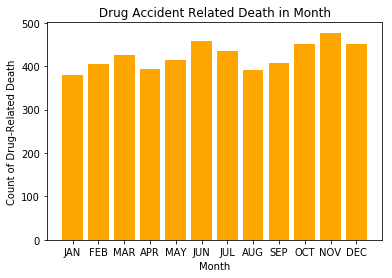

In [121]:
plt.bar(df_month.index,df_month,color='orange')
plt.ylabel('Count of Drug-Related Death')
plt.xlabel('Month')
plt.title(' Drug Accident Related Death in Month ')
plt.show()

In [122]:
#Analyze the week of day
#df_week=pd.concat([add_df['new_date'],add_df['day_of_week']],axis=1)
df_week=add_df['day_of_week'].value_counts()
df_week

FRI     825
SAT     821
SUN     744
MON     695
TUE     678
THUR    671
WED     653
Name: day_of_week, dtype: int64

In [123]:

df_week=df_week.loc[['MON','TUE','WED','THUR','FRI','SAT','SUN']]


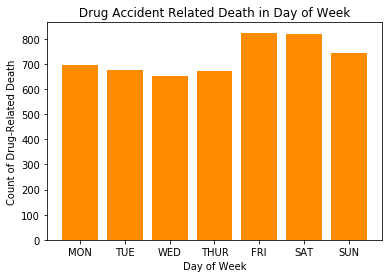

In [124]:
plt.bar(df_week.index,df_week,color='darkorange')
plt.ylabel('Count of Drug-Related Death')
plt.xlabel('Day of Week')
plt.title(' Drug Accident Related Death in Day of Week ')
plt.show()

In [125]:
#Analyze Holiday
df_Holiday=add_df['Holiday'].value_counts()

In [126]:
df_Holiday=df_Holiday.sort_values()
df_Holiday.sum()
df_Holiday

PRESIDENTS DAY (WASHINGTONS BIRTHDAY)    12
NEW YEAR DAY                             13
LABOR DAY                                13
COLUMBUS DAY                             14
VETERANS DAY                             15
CHRISTMAS DAY                            15
MARTIN LUTHER KING JR. DAY               16
MEMORIAL DAY                             18
INDEPENDENCE DAY                         19
THANKSGIVING DAY                         20
Name: Holiday, dtype: int64

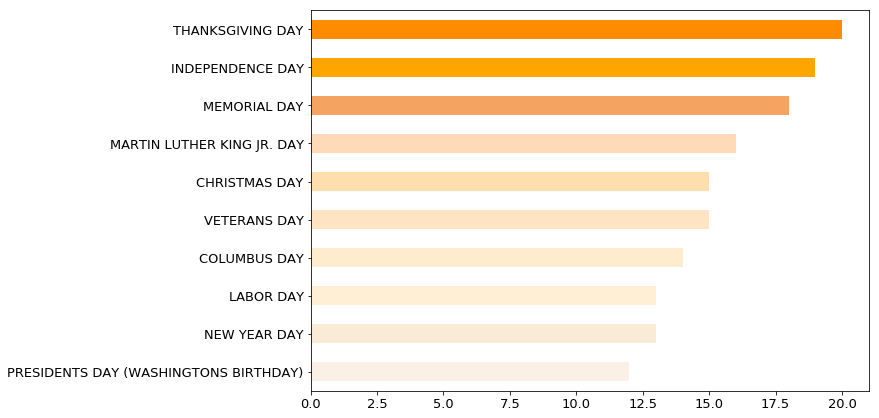

In [127]:
df_Holiday.plot(kind='barh', figsize=(10,7), color=['linen', 'antiquewhite', 'papayawhip', 'blanchedalmond', 'bisque', 'navajowhite', 'peachpuff', 'sandybrown', 'orange', 'darkorange'], fontsize=13);
plt.show()


In [128]:
df_Holiday_cal=pd.concat([add_df['new_date'],add_df['Holiday']],axis=1)
df_Holiday_cal=df_Holiday_cal.dropna()
dates_unique = df_Holiday_cal['new_date'].unique()
len(dates_unique)

58

In [129]:
df_Holiday_cal=pd.concat([add_df['new_date'],add_df['Holiday']],axis=1)
df_Holiday_non = df_Holiday_cal[df_Holiday_cal.isnull().any(axis=1)]
dates_unique = df_Holiday_non['new_date'].unique()
len(dates_unique)

2038

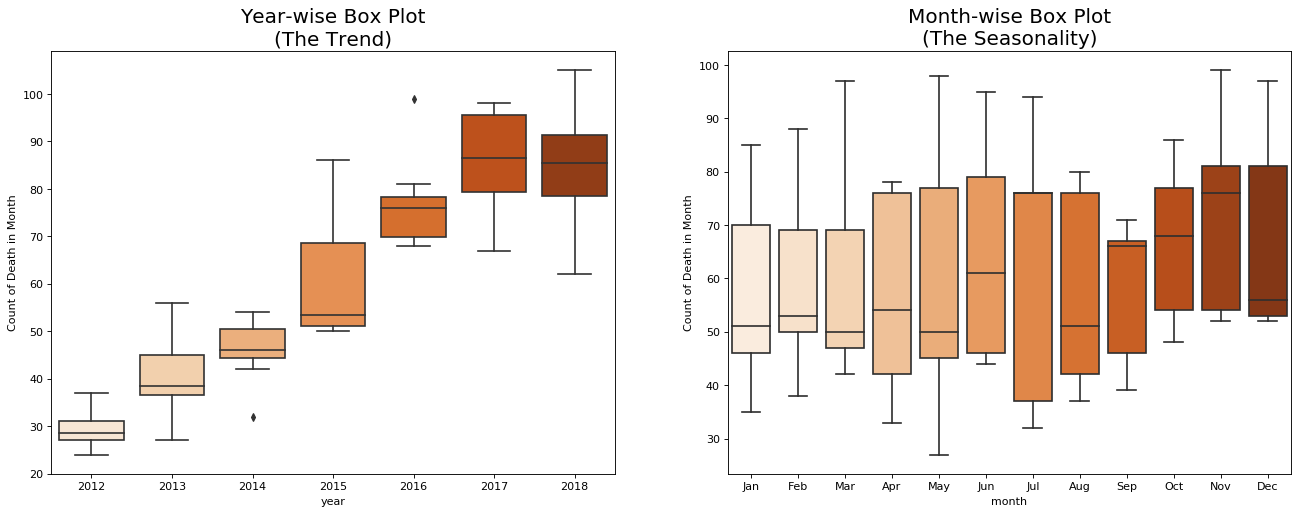

In [130]:
#boxplot for year and month
import seaborn as sns
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Count of Death in Month', data=df_month_sea, ax=axes[0], palette="Oranges")
sns.boxplot(x='month', y='Count of Death in Month', data=df_month_sea.loc[~df_month_sea.year.isin([2012, 2018]), :], palette="Oranges")

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()